# 04 Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, GaussianNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

Load the data

In [2]:
activity = pd.read_csv('preprocessed.csv')

In [3]:
activity.head()

,Unnamed: 0,text,label,word_count,char_length,tokenize_text
0,0,This post is also available in: 日本語 (Japa...,malware,55,354,post also available 日本語 japanese ctblocker wel...
1,1,The attack vector is very basic and repeats it...,attack-pattern,22,132,attack vector basic repeat begin spear phishin...
2,2,Once executed by the user the first stage malw...,safe,20,123,executed user first stage malware downloads ex...
3,3,The first known campaign was launched by Crim...,TIME,11,69,first known campaign launched crimeware november
4,4,The first stage downloaded the ransomware from...,safe,9,59,first stage downloaded ransomware site


Drop the additional column container the indexes

In [4]:
activity = activity.drop(activity.columns[0], axis=1)

In [5]:
activity.head()

,text,label,word_count,char_length,tokenize_text
0,This post is also available in: 日本語 (Japa...,malware,55,354,post also available 日本語 japanese ctblocker wel...
1,The attack vector is very basic and repeats it...,attack-pattern,22,132,attack vector basic repeat begin spear phishin...
2,Once executed by the user the first stage malw...,safe,20,123,executed user first stage malware downloads ex...
3,The first known campaign was launched by Crim...,TIME,11,69,first known campaign launched crimeware november
4,The first stage downloaded the ransomware from...,safe,9,59,first stage downloaded ransomware site


In [6]:
activity['label'].value_counts()

safe              4140
malware           1003
location           711
SOFTWARE           623
attack-pattern     617
identity           593
threat-actor       466
TIME               245
tools              201
FILEPATH           162
vulnerability      135
SHA2                80
campaign            71
URL                 65
IPV4                31
SHA1                30
DOMAIN              25
Infrastucture       24
hash                13
EMAIL               12
REGISTRYKEY         10
MD5                  8
url                  4
Name: label, dtype: int64

In [7]:
activity.isna().sum()

text               0
label              0
word_count         0
char_length        0
tokenize_text    369
dtype: int64

Fill in the missing data with empty strings as a place holder for unknown data

In [8]:
activity = activity.fillna("")

In [9]:
activity.isna().sum()

text             0
label            0
word_count       0
char_length      0
tokenize_text    0
dtype: int64

Select the X and y data for our train_test_split

In [10]:
X = activity['tokenize_text']
y = activity['label']
len(X)

9269

Split the data into training and testing sets 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
len(X_train)

7415

# 05 Modeling

Setting up pipelines for different text classifiers and TF-IDF vectorization

In [13]:
pipeMNB = Pipeline([('tfidf', TfidfVectorizer()),('clf', MultinomialNB())])
pipeCNB = Pipeline([('tfidf', TfidfVectorizer()),('clf', ComplementNB())])
pipeSVC = Pipeline([('tfidf', TfidfVectorizer()),('clf', LinearSVC())])
pipeBNB = Pipeline([('tfidf', TfidfVectorizer()),('clf', BernoulliNB())])

### MultinomialNB

In [14]:
pipeMNB.fit(X_train, y_train)
predMNB = pipeMNB.predict(X_test)
predMNB

array(['safe', 'safe', 'safe', ..., 'safe', 'safe', 'safe'], dtype='<U14')

In [15]:
MNB_accuracy = accuracy_score(y_test, predMNB)
print(f"MNB Accuracy Score: {accuracy_score(y_test, predMNB) :.2f}")

MNB Accuracy Score: 0.46


In [16]:
MNB_precision = precision_score(y_test, predMNB, average='macro')
print(f"MNB Precision Score: {precision_score(y_test, predMNB, average='macro') :.2f}")

MNB Precision Score: 0.16


C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
MNB_recall = recall_score(y_test, predMNB, average='macro')
print(f"MNB Recall Score: {recall_score(y_test, predMNB, average='macro') :.2f}")

MNB Recall Score: 0.05


In [18]:
MNB_f1 = f1_score(y_test, predMNB, average='macro')
print(f"MNB F1 Score: {f1_score(y_test, predMNB, average='macro') :.2f}")

MNB F1 Score: 0.05


In [19]:
print(classification_report(y_test, predMNB))

                precision    recall  f1-score   support

        DOMAIN       0.00      0.00      0.00         4
         EMAIL       0.00      0.00      0.00         3
      FILEPATH       0.00      0.00      0.00        36
          IPV4       0.00      0.00      0.00         4
 Infrastucture       0.00      0.00      0.00         6
           MD5       0.00      0.00      0.00         1
   REGISTRYKEY       0.00      0.00      0.00         2
          SHA1       0.00      0.00      0.00         9
          SHA2       0.00      0.00      0.00        15
      SOFTWARE       0.00      0.00      0.00       125
          TIME       0.00      0.00      0.00        47
           URL       0.00      0.00      0.00        18
attack-pattern       0.75      0.02      0.04       134
      campaign       0.00      0.00      0.00        13
          hash       0.00      0.00      0.00         4
      identity       0.67      0.04      0.07       112
      location       0.45      0.03      0.06  

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ComplementNB

In [20]:
pipeCNB.fit(X_train, y_train)
predCNB = pipeCNB.predict(X_test)
predCNB

array(['safe', 'safe', 'attack-pattern', ..., 'safe', 'TIME', 'safe'],
      dtype='<U14')

In [21]:
CNB_accuracy = accuracy_score(y_test, predCNB)
print(f"CNB Accuracy Score: {accuracy_score(y_test, predCNB) :.2f}")

CNB Accuracy Score: 0.57


In [22]:
CNB_precision = precision_score(y_test, predCNB, average='macro')
print(f"CNB Precision Score: {precision_score(y_test, predCNB, average='macro') :.2f}")

CNB Precision Score: 0.42


C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
CNB_recall = recall_score(y_test, predCNB, average='macro')
print(f"CNB Recall Score: {recall_score(y_test, predCNB, average='macro') :.2f}")

CNB Recall Score: 0.28


In [24]:
CNB_f1 = f1_score(y_test, predCNB, average='macro')
print(f"CNB F1 Score: {f1_score(y_test, predCNB, average='macro') :.2f}")

CNB F1 Score: 0.31


In [25]:
print(classification_report(y_test, predCNB))

                precision    recall  f1-score   support

        DOMAIN       0.01      0.25      0.02         4
         EMAIL       1.00      0.33      0.50         3
      FILEPATH       0.46      0.17      0.24        36
          IPV4       0.00      0.00      0.00         4
 Infrastucture       0.67      0.33      0.44         6
           MD5       0.00      0.00      0.00         1
   REGISTRYKEY       0.00      0.00      0.00         2
          SHA1       0.50      0.11      0.18         9
          SHA2       0.50      0.20      0.29        15
      SOFTWARE       0.50      0.33      0.40       125
          TIME       0.43      0.26      0.32        47
           URL       0.75      0.17      0.27        18
attack-pattern       0.49      0.43      0.46       134
      campaign       0.25      0.08      0.12        13
          hash       0.00      0.00      0.00         4
      identity       0.49      0.52      0.50       112
      location       0.50      0.41      0.45  

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LinearSVC

In [26]:
pipeSVC.fit(X_train, y_train)
predSVC = pipeCNB.predict(X_test)
predSVC

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array(['safe', 'safe', 'attack-pattern', ..., 'safe', 'TIME', 'safe'],
      dtype='<U14')

In [27]:
SVC_accuracy = accuracy_score(y_test, predSVC)
print(f"SVC Accuracy Score: {accuracy_score(y_test, predSVC) :.2f}")

SVC Accuracy Score: 0.57


In [28]:
SVC_precision = precision_score(y_test, predSVC, average='macro')
print(f"SVC Precision Score: {precision_score(y_test, predSVC, average='macro') :.2f}")

SVC Precision Score: 0.42


C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
SVC_recall = recall_score(y_test, predSVC, average='macro')
print(f"SVC Recall Score: {recall_score(y_test, predSVC, average='macro') :.2f}")

SVC Recall Score: 0.28


In [30]:
SVC_f1 = f1_score(y_test, predSVC, average='macro')
print(f"SVC F1 Score: {f1_score(y_test, predSVC, average='macro') :.2f}")

SVC F1 Score: 0.31


In [31]:
print(classification_report(y_test, predSVC))

                precision    recall  f1-score   support

        DOMAIN       0.01      0.25      0.02         4
         EMAIL       1.00      0.33      0.50         3
      FILEPATH       0.46      0.17      0.24        36
          IPV4       0.00      0.00      0.00         4
 Infrastucture       0.67      0.33      0.44         6
           MD5       0.00      0.00      0.00         1
   REGISTRYKEY       0.00      0.00      0.00         2
          SHA1       0.50      0.11      0.18         9
          SHA2       0.50      0.20      0.29        15
      SOFTWARE       0.50      0.33      0.40       125
          TIME       0.43      0.26      0.32        47
           URL       0.75      0.17      0.27        18
attack-pattern       0.49      0.43      0.46       134
      campaign       0.25      0.08      0.12        13
          hash       0.00      0.00      0.00         4
      identity       0.49      0.52      0.50       112
      location       0.50      0.41      0.45  

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### BernoulliNB

In [32]:
pipeBNB.fit(X_train, y_train)
predBNB = pipeBNB.predict(X_test)
predBNB

array(['safe', 'safe', 'safe', ..., 'safe', 'safe', 'safe'], dtype='<U14')

In [33]:
BNB_accuracy = accuracy_score(y_test, predBNB)
print(f"BNB Accuracy Score: {accuracy_score(y_test, predBNB) :.2f}")

BNB Accuracy Score: 0.52


In [34]:
BNB_precision = precision_score(y_test, predBNB, average='macro')
print(f"BNB Precision Score: {precision_score(y_test, predBNB, average='macro') :.2f}")

BNB Precision Score: 0.18


C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
BNB_recall = recall_score(y_test, predBNB, average='macro')
print(f"BNB Recall Score: {recall_score(y_test, predBNB, average='macro') :.2f}")

BNB Recall Score: 0.09


In [36]:
BNB_f1 = f1_score(y_test, predBNB, average='macro')
print(f"BNB F1 Score: {f1_score(y_test, predBNB, average='macro') :.2f}")

BNB F1 Score: 0.10


In [37]:
print(classification_report(y_test, predBNB))

                precision    recall  f1-score   support

        DOMAIN       0.00      0.00      0.00         4
         EMAIL       0.00      0.00      0.00         3
      FILEPATH       0.00      0.00      0.00        36
          IPV4       0.00      0.00      0.00         4
 Infrastucture       0.00      0.00      0.00         6
           MD5       0.00      0.00      0.00         1
   REGISTRYKEY       0.00      0.00      0.00         2
          SHA1       0.00      0.00      0.00         9
          SHA2       0.00      0.00      0.00        15
      SOFTWARE       0.45      0.08      0.14       125
          TIME       0.00      0.00      0.00        47
           URL       0.00      0.00      0.00        18
attack-pattern       0.66      0.16      0.25       134
      campaign       0.00      0.00      0.00        13
          hash       0.00      0.00      0.00         4
      identity       0.51      0.21      0.30       112
      location       0.62      0.24      0.35  

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
myLabels = ['MultinomialNB', 'ComplementNB', 'LinearSVC', 'BernoulliNB']
Accuracy_score = [MNB_accuracy, CNB_accuracy, SVC_accuracy, BNB_accuracy]
Precision_score = [MNB_precision, CNB_precision, SVC_precision, BNB_precision]
Recall_score = [MNB_recall, CNB_recall, SVC_recall, BNB_recall]
F1_score = [MNB_f1, CNB_f1, SVC_f1, BNB_f1]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score, Precision_score, Recall_score, F1_score)), 
                             columns=['Classifier', 'Accuracy score', 'Precision_score', 'Recall_score', 'F1_score'])

print(score_tab_acc)

      Classifier  Accuracy score  Precision_score  Recall_score  F1_score
0  MultinomialNB        0.456311         0.163753      0.053785  0.045972
1   ComplementNB        0.573894         0.417448      0.275638  0.305906
2      LinearSVC        0.573894         0.417448      0.275638  0.305906
3    BernoulliNB        0.516721         0.175381      0.090865  0.099648


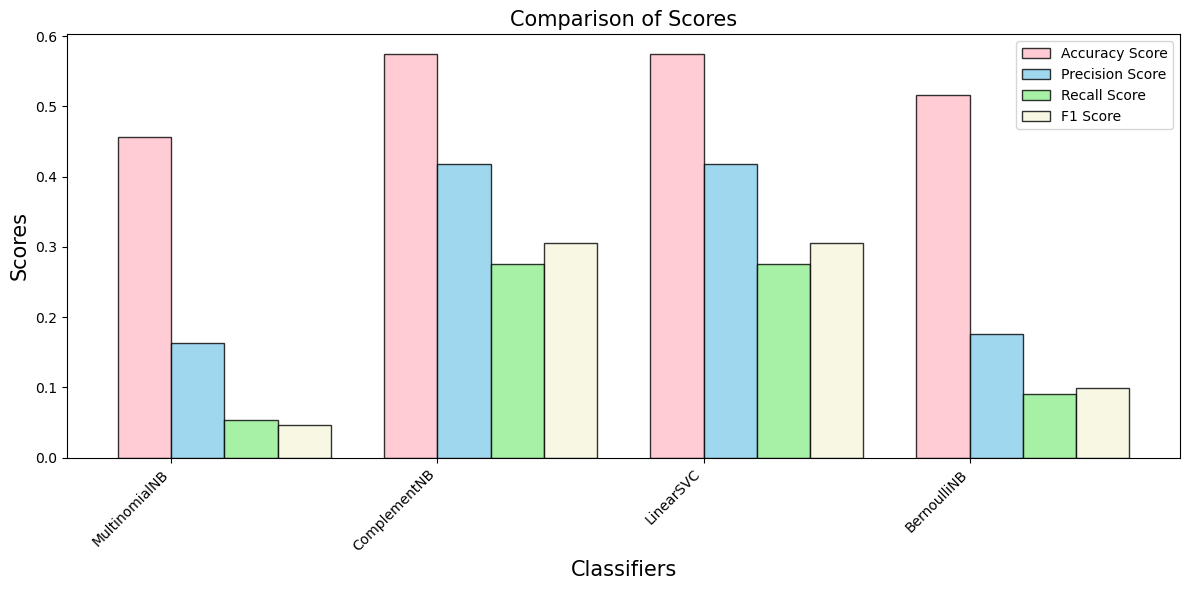

In [39]:
bar_width = 0.20
r1 = np.arange(len(myLabels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
plt.figure(figsize=(12, 6))
plt.bar(r1, Accuracy_score, color='pink', width=bar_width, edgecolor='k', alpha=0.8, label='Accuracy Score')
plt.bar(r2, Precision_score, color='skyblue', width=bar_width, edgecolor='k', alpha=0.8, label='Precision Score')
plt.bar(r3, Recall_score, color='lightgreen', width=bar_width, edgecolor='k', alpha=0.8, label='Recall Score')
plt.bar(r4, F1_score, color='beige', width=bar_width, edgecolor='k', alpha=0.8, label='F1 Score')
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.title('Comparison of Scores', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(len(myLabels))], myLabels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

* MultinomialNB: Lowest accuracy, precision, recall, and F1-score
* ComplementNB & LinearSVC: Identical accuracy, precision, recall and F1-score
* BernoulliNB: Slightly lower accuracy but comparable precision, recall, and F1-score to ComplementNB and LinearSVC

Overall, ComplementNB and LinearSVC performed the best.

#### Hyperparameter Tuning

In [40]:
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__alpha': [0.1, 0.5, 1.0],
}

grid_CNB = GridSearchCV(pipeCNB, param_grid, cv=5, scoring='accuracy')
grid_CNB.fit(X_train, y_train)
best_params_CNB = grid_CNB.best_params_
best_score_CNB = grid_CNB.best_score_
best_model_CNB = grid_CNB.best_estimator_
best_model_CNB.fit(X_train, y_train)
test_score_CNB = best_model_CNB.score(X_test, y_test)
print("Best hyperparameters:", best_params_CNB)
print("Best cross-validation score:", best_score_CNB)
print("Test set score:", test_score_CNB)

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'clf__alpha': 0.5, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 3)}
Best cross-validation score: 0.575590020229265
Test set score: 0.6019417475728155


In [41]:
predictions_CNB = best_model_CNB.predict(X_test)

In [42]:
CNB_accuracy = accuracy_score(y_test, predictions_CNB)
print(f"CNB Accuracy Score: {accuracy_score(y_test, predictions_CNB) :.2f}")

CNB Accuracy Score: 0.60


In [43]:
CNB_precision = precision_score(y_test, predictions_CNB, average='macro')
print(f"CNB Precision Score: {precision_score(y_test, predictions_CNB, average='macro') :.2f}")

CNB Precision Score: 0.49


C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
CNB_recall = recall_score(y_test, predictions_CNB, average='macro')
print(f"CNB Recall Score: {recall_score(y_test, predictions_CNB, average='macro') :.2f}")

CNB Recall Score: 0.32


In [45]:
CNB_f1 = f1_score(y_test, predictions_CNB, average='macro')
print(f"CNB F1 Score: {f1_score(y_test, predictions_CNB, average='macro') :.2f}")

CNB F1 Score: 0.36


In [46]:
print(classification_report(y_test, predictions_CNB))

                precision    recall  f1-score   support

        DOMAIN       0.01      0.25      0.02         4
         EMAIL       1.00      0.33      0.50         3
      FILEPATH       0.67      0.17      0.27        36
          IPV4       0.00      0.00      0.00         4
 Infrastucture       1.00      0.67      0.80         6
           MD5       0.00      0.00      0.00         1
   REGISTRYKEY       0.00      0.00      0.00         2
          SHA1       0.00      0.00      0.00         9
          SHA2       0.50      0.20      0.29        15
      SOFTWARE       0.55      0.25      0.34       125
          TIME       0.63      0.26      0.36        47
           URL       0.86      0.33      0.48        18
attack-pattern       0.62      0.49      0.55       134
      campaign       0.80      0.62      0.70        13
          hash       0.00      0.00      0.00         4
      identity       0.59      0.52      0.55       112
      location       0.63      0.41      0.50  

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It seems hyperparameter tuning improved the accuracy for ComplementNB

In [47]:
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__C': [0.1, 0.5, 1.0],
    'clf__dual': [True, False]
}

grid_SVC = GridSearchCV(pipeSVC, param_grid, cv=5, scoring='accuracy')
grid_SVC.fit(X_train, y_train)
best_params_SVC = grid_SVC.best_params_
best_score_SVC = grid_SVC.best_score_
best_model_SVC = grid_SVC.best_estimator_
best_model_SVC.fit(X_train, y_train)
test_score_SVC = best_model_SVC.score(X_test, y_test)
print("Best hyperparameters:", best_params_SVC)
print("Best cross-validation score:", best_score_SVC)
print("Test set score:", test_score_SVC)

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'clf__C': 0.5, 'clf__dual': True, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 1)}
Best cross-validation score: 0.6298044504383007
Test set score: 0.6499460625674218


In [48]:
predictions_SVC = best_model_SVC.predict(X_test)

In [49]:
SVC_accuracy = accuracy_score(y_test, predictions_SVC)
print(f"SVC Accuracy Score: {accuracy_score(y_test, predictions_SVC) :.2f}")

SVC Accuracy Score: 0.65


In [50]:
SVC_precision = precision_score(y_test, predictions_SVC, average='macro')
print(f"SVC Precision Score: {precision_score(y_test, predictions_SVC, average='macro') :.2f}")

SVC Precision Score: 0.47


C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
SVC_recall = recall_score(y_test, predictions_SVC, average='macro')
print(f"SVC Recall Score: {recall_score(y_test, predictions_SVC, average='macro') :.2f}")

SVC Recall Score: 0.30


In [52]:
SVC_f1 = f1_score(y_test, predictions_SVC, average='macro')
print(f"SVC F1 Score: {f1_score(y_test, predictions_SVC, average='macro') :.2f}")

SVC F1 Score: 0.34


In [53]:
print(classification_report(y_test, predictions_SVC))

                precision    recall  f1-score   support

        DOMAIN       0.00      0.00      0.00         4
         EMAIL       1.00      0.33      0.50         3
      FILEPATH       0.62      0.14      0.23        36
          IPV4       0.00      0.00      0.00         4
 Infrastucture       1.00      0.67      0.80         6
           MD5       0.00      0.00      0.00         1
   REGISTRYKEY       0.00      0.00      0.00         2
          SHA1       0.00      0.00      0.00         9
          SHA2       0.00      0.00      0.00        15
      SOFTWARE       0.60      0.37      0.46       125
          TIME       0.63      0.26      0.36        47
           URL       1.00      0.22      0.36        18
attack-pattern       0.60      0.53      0.56       134
      campaign       0.67      0.46      0.55        13
          hash       0.00      0.00      0.00         4
      identity       0.55      0.46      0.50       112
      location       0.62      0.38      0.47  

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It seems hyperparameter tuning improved the accuracy for LinearSVC as well

In [54]:
myLabels = ['MultinomialNB', 'ComplementNB', 'LinearSVC', 'BernoulliNB']
Accuracy_score = [MNB_accuracy, CNB_accuracy, SVC_accuracy, BNB_accuracy]
Precision_score = [MNB_precision, CNB_precision, SVC_precision, BNB_precision]
Recall_score = [MNB_recall, CNB_recall, SVC_recall, BNB_recall]
F1_score = [MNB_f1, CNB_f1, SVC_f1, BNB_f1]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score, Precision_score, Recall_score, F1_score)), 
                             columns=['Classifier', 'Accuracy score', 'Precision_score', 'Recall_score', 'F1_score'])

print(score_tab_acc)

      Classifier  Accuracy score  Precision_score  Recall_score  F1_score
0  MultinomialNB        0.456311         0.163753      0.053785  0.045972
1   ComplementNB        0.601942         0.491096      0.316059  0.363008
2      LinearSVC        0.649946         0.465031      0.296269  0.343107
3    BernoulliNB        0.516721         0.175381      0.090865  0.099648


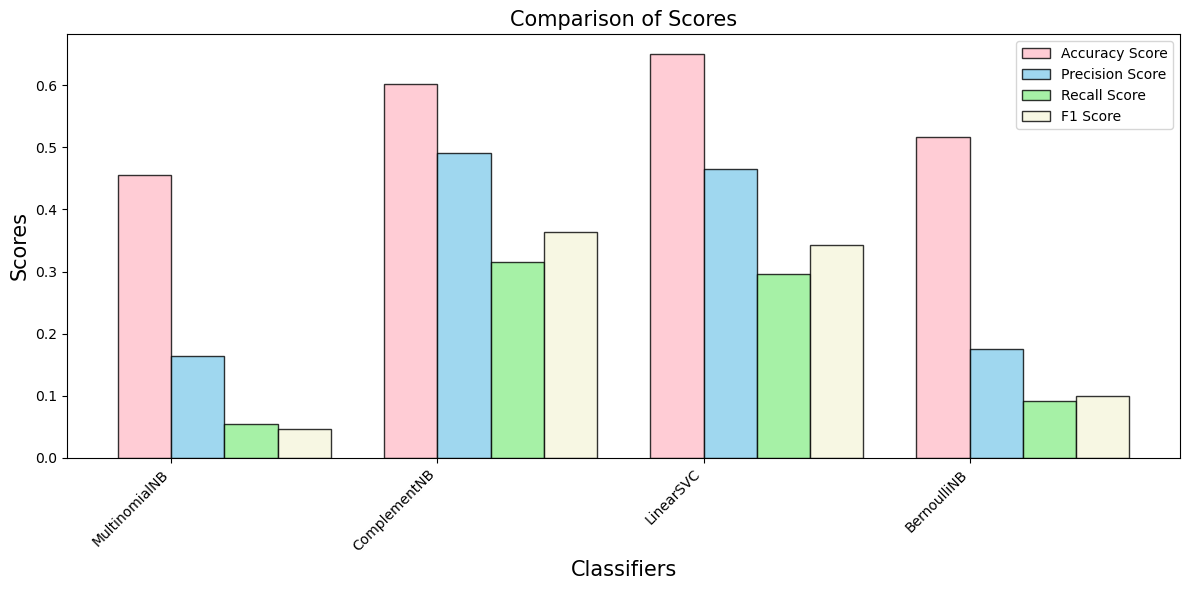

In [55]:
bar_width = 0.20
r1 = np.arange(len(myLabels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
plt.figure(figsize=(12, 6))
plt.bar(r1, Accuracy_score, color='pink', width=bar_width, edgecolor='k', alpha=0.8, label='Accuracy Score')
plt.bar(r2, Precision_score, color='skyblue', width=bar_width, edgecolor='k', alpha=0.8, label='Precision Score')
plt.bar(r3, Recall_score, color='lightgreen', width=bar_width, edgecolor='k', alpha=0.8, label='Recall Score')
plt.bar(r4, F1_score, color='beige', width=bar_width, edgecolor='k', alpha=0.8, label='F1 Score')
plt.xlabel('Classifiers', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.title('Comparison of Scores', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(len(myLabels))], myLabels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

* LinearSVC: Highest accuracy score and precision score overall
* Complement NB: Highest precision score but lower accuracy score than LinearSVC
* CernoulliNB: Lowest scores overall

LinearSVC seems to perform the best

Testing the model to see if it can predict using new data

In [56]:
import nltk 
import string
import re
import langid
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
def tokenize_text(text):
    text = re.sub(r'[\[\](){}<>]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    
    lang, _ = langid.classify(text)
    
    if lang == 'en':
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        punctuations = set(string.punctuation)

        filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in punctuations]
        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
        tokenize_text = ' '.join(lemmatized_tokens)
        return tokenize_text
    else:
        return ''

new_data = "Maikspy on the Windows platform Figure 7."
#This is malware

preprocessed_data = tokenize_text(new_data)
print("Preprocessed data:", preprocessed_data)

Preprocessed data: maikspy window platform figure


In [58]:
predictions = best_model_SVC.predict([preprocessed_data])
predictions

array(['malware'], dtype=object)

In [59]:
new_data2 = "On the other hand, FIN7 performs hooking."
#This is attack-pattern

preprocessed_data2 = tokenize_text(new_data2)
print("Preprocessed data:", preprocessed_data2)

Preprocessed data: hand fin performs hooking


In [60]:
predictions2 = best_model_SVC.predict([preprocessed_data2])
predictions2

array(['attack-pattern'], dtype=object)

The model has successfully predicted the correct label for each text